In [37]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import os.path
import numpy as np
from math import floor
import seaborn as sns
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px

### Diretório e base de dados

In [38]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\Laiz-\OneDrive\Área de Trabalho\predicao_cancer_pulmao


In [39]:
base = pd.read_csv('surveylungcancer.csv')

In [40]:
base.shape[0]

309

### Limpeza de dados

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

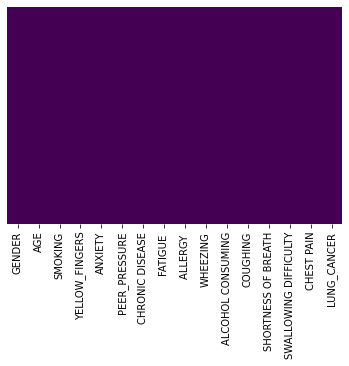

In [41]:
# Usamos heatmap da biblioteca seaborn para identificar elementos nulos e o comando isnull que verifica linhas nulas
sns.heatmap(base.isnull(),yticklabels=False,cbar=False,cmap="viridis")
base.isnull().sum()

Logo, podemos concluir que os dados vieram livres de elementos nulos, tanto nas linhas, assim como nas colunas. 

In [42]:
# dropna() remove os valores nulos (valores ausentes) do DataFrame , deixando cair as linhas ou colunas que contêm os valores 
#nulos. Os valores nulos são NaN ( Not a Number ) e NaT ( Not a Time )
base.dropna(inplace=True)
base

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [43]:
base.shape[0]

309

In [44]:
#A função value_counts retorna o valor da contagem para cada item exclusivo presente na coluna
base.GENDER.value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [45]:
lista = [nome.strip() for nome in base.columns]
base.columns =  lista 

Com isso, é possível perceber que o número de homens que responderam a pesquisa foi de 162 e o número de mulheres foi de 147.

# Análises Iniciais

In [46]:
# Trocando os nomes das linhas da coluna Lung_Cancer 
# YES = 2 e NO = 1
for i in range(len(base['LUNG_CANCER'])):
    if base['LUNG_CANCER'][i] == 'YES':
        base.loc[i ,'LUNG_CANCER'] = 2
    else: 
        base.loc[i ,'LUNG_CANCER'] = 1 
display(base)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2


Filtragem dos dados separando pessoas que têm chances de ter câncer de pulmão das que não têm:

In [47]:
yes_cancer = base.loc[base['LUNG_CANCER'] == 2]
no_cancer = base.loc[base['LUNG_CANCER'] == 1]
print(f"{yes_cancer.shape[0]}, {no_cancer.shape[0]}")

270, 39


In [48]:
base.AGE.describe()

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

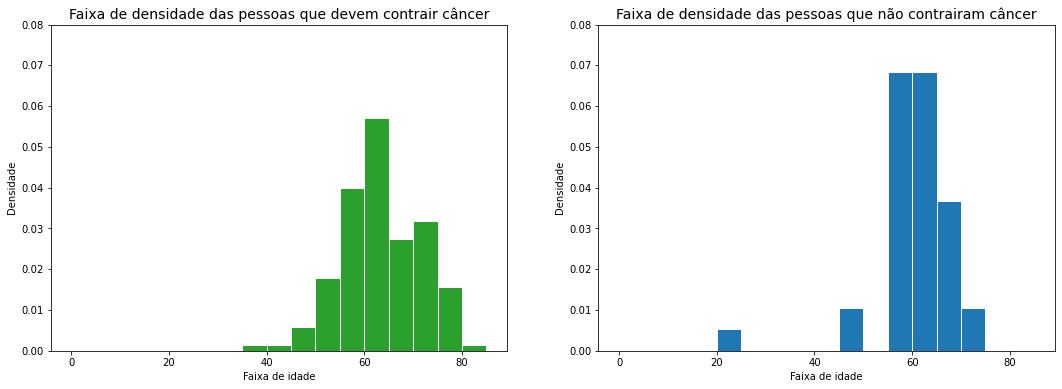

In [49]:
range_AGE = np.arange(0, 90,5)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(yes_cancer.AGE, bins = range_AGE, edgecolor='white', density = True, color = 'tab:Green')
plt.title("Faixa de densidade das pessoas que devem contrair câncer", size=14)
plt.xlabel("Faixa de idade")
plt.ylabel("Densidade")
plt.ylim(0,0.08)

plt.subplot(122)
plt.hist(no_cancer.AGE, bins = range_AGE, edgecolor='white', density = True, color = 'tab:blue')
plt.title("Faixa de densidade das pessoas que não contrairam câncer", size=14)
plt.xlabel("Faixa de idade")
plt.ylabel("Densidade")
plt.ylim(0,0.08)


plt.show()

# Cancer and yellow fingers

In [50]:
#Gráfico correlativo de cancer and yellow_fingers.
dyf = base.groupby(by=["YELLOW_FINGERS", "LUNG_CANCER"]).size().reset_index(name="counts")
dyf

,YELLOW_FINGERS,LUNG_CANCER,counts
0,1,1,26
1,1,2,107
2,2,1,13
3,2,2,163


In [51]:
px.histogram(data_frame=dyf, x="LUNG_CANCER", y="counts", color="YELLOW_FINGERS", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Bold)

# Cancer and anxiety


In [52]:
#Gráfico correlativo de cancer and anxiety
dan = base.groupby(by=["ANXIETY", "LUNG_CANCER"]).size().reset_index(name="counts")
dan

,ANXIETY,LUNG_CANCER,counts
0,1,1,27
1,1,2,128
2,2,1,12
3,2,2,142


In [53]:
px.histogram(data_frame=dan, x="LUNG_CANCER", y="counts", color="ANXIETY", barmode='group',
             color_discrete_sequence=px.colors.qualitative.T10)


 # Cancer and Peer Pressure

In [54]:
#Gráfico correlativo de cancer and peer_pressure
dpp = base.groupby(by=["PEER_PRESSURE", "LUNG_CANCER"]).size().reset_index(name="counts")
dpp

,PEER_PRESSURE,LUNG_CANCER,counts
0,1,1,29
1,1,2,125
2,2,1,10
3,2,2,145


In [55]:
px.histogram(data_frame=dpp, x="LUNG_CANCER", y="counts", color="PEER_PRESSURE", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Alphabet)


# Cancer and Shortness of Breath

In [56]:
# Gráfico correlativo de cancer and shortness of breath
dsb = base.groupby(by=["SHORTNESS OF BREATH", "LUNG_CANCER"]).size().reset_index(name="counts")
dsb

,SHORTNESS OF BREATH,LUNG_CANCER,counts
0,1,1,17
1,1,2,94
2,2,1,22
3,2,2,176


In [57]:
px.histogram(data_frame=dpp, x="LUNG_CANCER", y="counts", color="PEER_PRESSURE", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Dark2)

# Cancer and Swallowing Diffyculty

In [58]:
dsd = base.groupby(by=["SWALLOWING DIFFICULTY", "LUNG_CANCER"]).size().reset_index(name="counts")
dsd

,SWALLOWING DIFFICULTY,LUNG_CANCER,counts
0,1,1,34
1,1,2,130
2,2,1,5
3,2,2,140


In [59]:
px.histogram(data_frame=dsd, x="LUNG_CANCER", y="counts", color="SWALLOWING DIFFICULTY", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Dark24)

# Cancer and Chest Pain

In [60]:
dcp = base.groupby(by=["CHEST PAIN", "LUNG_CANCER"]).size().reset_index(name="counts")
dcp

,CHEST PAIN,LUNG_CANCER,counts
0,1,1,27
1,1,2,110
2,2,1,12
3,2,2,160


In [61]:
px.histogram(data_frame=dcp, x="LUNG_CANCER", y="counts", color="CHEST PAIN", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Prism)

## Análise da correlação entre gênero e câncer de pulmão:


In [62]:
base_gerder = base.groupby(by=["GENDER", "LUNG_CANCER"]).size().reset_index(name="counts")

base_gerder

,GENDER,LUNG_CANCER,counts
0,F,1,22
1,F,2,125
2,M,1,17
3,M,2,145


In [63]:
#Gráfico da relação entre eles
px.histogram(data_frame=base_gerder, x="LUNG_CANCER")
px.histogram(data_frame=base_gerder, x="LUNG_CANCER", y="counts", color="GENDER", barmode='group', color_discrete_sequence=px.colors.qualitative.Bold)


## Correlação entre Asma e Câncer de Pulmão:
### Legenda:
'Wheeling' : Asma = Não possui = 1

'Wheeling' : Asma = Possui = 2


In [64]:
base_asma = base.groupby(by=["WHEEZING", "LUNG_CANCER"]).size().reset_index(name="counts")
base_asma 

,WHEEZING,LUNG_CANCER,counts
0,1,1,30
1,1,2,107
2,2,1,9
3,2,2,163


In [65]:
#Gráfico da relação entre asma e cancer de pulmão
px.histogram(data_frame=base_asma, x="LUNG_CANCER", y="counts", color="WHEEZING", barmode='group', color_discrete_sequence=px.colors.qualitative.Alphabet)


## Consumo de alcool e câncer no pulmão

#### NO ALCOHOL CONSUMING = 1 
#### YES ALCOHOL CONSUMING = 2

In [66]:
dados_alcohol = base.groupby(by=["ALCOHOL CONSUMING", "LUNG_CANCER"]).size().reset_index(name="counts")
dados_alcohol

,ALCOHOL CONSUMING,LUNG_CANCER,counts
0,1,1,32
1,1,2,105
2,2,1,7
3,2,2,165


In [67]:
#Gráfico consumo de alcool vs cancer
px.histogram(data_frame=dados_alcohol, x="LUNG_CANCER", y="counts", color="ALCOHOL CONSUMING", barmode='group', color_discrete_sequence=px.colors.qualitative.Dark24)


## Correlação entre Tosse crônica e câncer de pulmão:

In [68]:
dados_tosse = base.groupby(by=["COUGHING", "LUNG_CANCER"]).size().reset_index(name="counts")
dados_tosse

,COUGHING,LUNG_CANCER,counts
0,1,1,29
1,1,2,101
2,2,1,10
3,2,2,169


In [69]:
px.histogram(data_frame=dados_tosse, x="LUNG_CANCER", y="counts", color="COUGHING", barmode='group', color_discrete_sequence=px.colors.qualitative.Alphabet)


In [70]:
dg = base.groupby(by=["SMOKING", "LUNG_CANCER"]).size().reset_index(name="counts")
px.histogram(data_frame=dg, x="LUNG_CANCER", y="counts", color="SMOKING", barmode='group')

In [71]:
dg0 = base.groupby(by=["CHRONIC DISEASE", "LUNG_CANCER"]).size().reset_index(name="counts")
px.histogram(data_frame=dg0, x="LUNG_CANCER", y="counts", color="CHRONIC DISEASE", barmode='group')

In [72]:
dg1 = base.groupby(by=["FATIGUE", "LUNG_CANCER"]).size().reset_index(name="counts")
px.histogram(data_frame=dg1, x="LUNG_CANCER", y="counts", color="FATIGUE", barmode='group')

In [73]:
dg2 = base.groupby(by=["ALLERGY", "LUNG_CANCER"]).size().reset_index(name="counts")
px.histogram(data_frame=dg2, x="LUNG_CANCER", y="counts", color="ALLERGY", barmode='group')

# Decision Trees